In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import sys
sys.path.append("../src/geotransformer/experiments/lomatch")
sys.path.append("../")

import torch
print(torch.cuda.is_available())
from util.data import PairBreakingBadDataset
from config import make_cfg
from dataset import train_valid_data_loader

torch.multiprocessing.set_start_method('spawn')

import jhutil
import yaml
import torch
torch.manual_seed(1234)
from jhutil import show_meshes

True


In [2]:
%matplotlib widget

In [3]:
from multi_part_assembly.datasets.geometry_data import build_geometry_dataset, build_geometry_dataloader
from multi_part_assembly.datasets.geometry_data import GeometryPartDataset as BreakingBadDataset

import jhutil
import torch
from torch.utils.data import Dataset, DataLoader
import torch
from jhutil import show_meshes, show_point_clouds

In [4]:
cfg = jhutil.load_yaml("../yamls/data_example.yaml")
cfg.data.overfit = 1
train_data, val_data = build_geometry_dataset(cfg)

In [5]:
len(train_data)

3

In [6]:
gt_quat = torch.tensor([1,0,0,0], dtype=torch.float32)

import jhutil; jhutil.jhprint(1111, gt_quat)

1111  "tensor[4] x∈[0., 1.000] μ=0.250 σ=0.500 [1.000, 0., 0., 0.]"


In [7]:
data = train_data[0]
data

1111  "artifact/101902_sf/mode_4"


/data/wlsgur4011/part_assembly/src/multi-part-assembly/multi_part_assembly/datasets/geometry_data.py:287: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811806235/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  area_faces = torch.Tensor(mesh.area_faces)  # (f_i)


2222  "[tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.779, 1.053] μ=-0.065 σ=0.579, tensor[24952, 3] n=74856 (0.3Mb) x∈[-2.420, 2.178] μ=-0.036 σ=0.777, tensor[2269, 3] n=6807 (27Kb) x∈[-2.417, 2.174] μ=0.231 σ=1.788]"
3333  "tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.779, 1.053] μ=-0.065 σ=0.579"
4444  "tensor[3] x∈[-0.442, 0.163] μ=-0.065 σ=0.328 [0.083, 0.163, -0.442]"
5555  "array[4] x∈[-0.656, 0.674] μ=-0.080 σ=0.494 [-0.340, 0.001, 0.674, -0.656]"
3333  "tensor[24952, 3] n=74856 (0.3Mb) x∈[-2.420, 2.178] μ=-0.036 σ=0.777"
4444  "tensor[3] x∈[-0.606, 0.258] μ=-0.036 σ=0.494 [0.240, 0.258, -0.606]"
5555  "array[4] x∈[-0.301, 0.949] μ=0.174 σ=0.469 [0.083, -0.301, 0.949, -0.036]"
3333  "tensor[2269, 3] n=6807 (27Kb) x∈[-2.417, 2.174] μ=0.231 σ=1.788"
4444  "tensor[3] x∈[-2.265, 1.782] μ=0.231 σ=2.183 [1.782, 1.176, -2.265]"
5555  "array[4] x∈[-0.180, 0.888] μ=0.290 σ=0.407 [0.030, 0.888, 0.421, -0.180]"


{'pcs': None,
 'broken_pcs': [tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.268, 1.399] μ=-2.121e-09 σ=0.513,
  tensor[24952, 3] n=74856 (0.3Mb) x∈[-1.890, 2.004] μ=-2.089e-08 σ=0.664,
  tensor[2269, 3] n=6807 (27Kb) x∈[-0.355, 0.426] μ=-1.217e-07 σ=0.149],
 'quat': [array([-0.33999107,  0.00122137,  0.67407593, -0.65576385]),
  array([ 0.08260156, -0.3013979 ,  0.94922204, -0.03624643]),
  array([ 0.02987705,  0.88835479,  0.42148664, -0.17967233])],
 'trans': [tensor[3] x∈[-0.442, 0.163] μ=-0.065 σ=0.328 [0.083, 0.163, -0.442],
  tensor[3] x∈[-0.606, 0.258] μ=-0.036 σ=0.494 [0.240, 0.258, -0.606],
  tensor[3] x∈[-2.265, 1.782] μ=0.231 σ=2.183 [1.782, 1.176, -2.265]],
 'data_id': 0,
 'dir_name': '/data/wlsgur4011/DataCollection/BreakingBad/data_split/artifact/101902_sf/mode_4',
 'file_names': ['piece_0.obj', 'piece_1.obj', 'piece_2.obj'],
 'adjacent_pair': [(1, 0), (2, 1)]}

In [8]:
from jhutil import quat_trans_transform, matrix_transform

1111  "artifact/101902_sf/mode_4"
2222  "[tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.779, 1.053] μ=-0.065 σ=0.579, tensor[24952, 3] n=74856 (0.3Mb) x∈[-2.420, 2.178] μ=-0.036 σ=0.777, tensor[2269, 3] n=6807 (27Kb) x∈[-2.417, 2.174] μ=0.231 σ=1.788]"
3333  "tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.779, 1.053] μ=-0.065 σ=0.579"
4444  "tensor[3] x∈[-0.442, 0.163] μ=-0.065 σ=0.328 [0.083, 0.163, -0.442]"
5555  "array[4] x∈[-0.656, 0.674] μ=-0.080 σ=0.494 [-0.340, 0.001, 0.674, -0.656]"
3333  "tensor[24952, 3] n=74856 (0.3Mb) x∈[-2.420, 2.178] μ=-0.036 σ=0.777"
4444  "tensor[3] x∈[-0.606, 0.258] μ=-0.036 σ=0.494 [0.240, 0.258, -0.606]"
5555  "array[4] x∈[-0.301, 0.949] μ=0.174 σ=0.469 [0.083, -0.301, 0.949, -0.036]"
3333  "tensor[2269, 3] n=6807 (27Kb) x∈[-2.417, 2.174] μ=0.231 σ=1.788"
4444  "tensor[3] x∈[-2.265, 1.782] μ=0.231 σ=2.183 [1.782, 1.176, -2.265]"
5555  "array[4] x∈[-0.180, 0.888] μ=0.290 σ=0.407 [0.030, 0.888, 0.421, -0.180]"
1111  "3" "3" "3"
0000  "tensor[22778, 3] n=68334 (0.3Mb)

/data/wlsgur4011/part_assembly/src/jhutil/jhutil/three_d.py:236: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_matrix = quaternion_to_matrix(torch.tensor(quaternion))


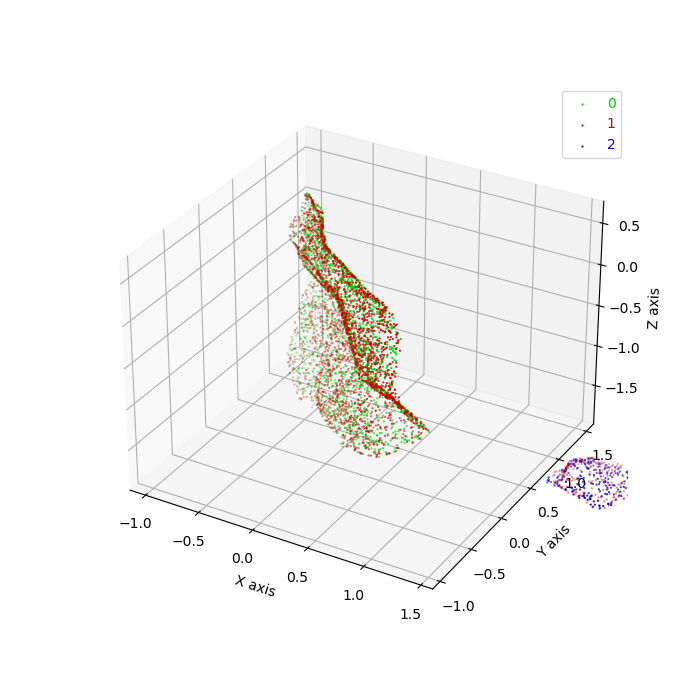

1111  "artifact/101902_sf/mode_2"
2222  "[tensor[25036, 3] n=75108 (0.3Mb) x∈[-2.340, 1.056] μ=-0.125 σ=0.659, tensor[23555, 3] n=70665 (0.3Mb) x∈[-1.771, 1.059] μ=-0.065 σ=0.578, tensor[1407, 3] n=4221 (16Kb) x∈[-2.370, 0.513] μ=-1.126 σ=1.026]"
3333  "tensor[25036, 3] n=75108 (0.3Mb) x∈[-2.340, 1.056] μ=-0.125 σ=0.659"
4444  "tensor[3] x∈[-0.543, 0.092] μ=-0.125 σ=0.363 [0.092, 0.078, -0.543]"
5555  "array[4] x∈[-0.470, 0.818] μ=0.113 σ=0.487 [0.818, -0.470, -0.176, 0.281]"
3333  "tensor[23555, 3] n=70665 (0.3Mb) x∈[-1.771, 1.059] μ=-0.065 σ=0.578"
4444  "tensor[3] x∈[-0.445, 0.164] μ=-0.065 σ=0.331 [0.084, 0.164, -0.445]"
5555  "array[4] x∈[0.070, 0.768] μ=0.434 σ=0.247 [0.443, 0.456, 0.768, 0.070]"
3333  "tensor[1407, 3] n=4221 (16Kb) x∈[-2.370, 0.513] μ=-1.126 σ=1.026"
4444  "tensor[3] x∈[-2.214, 0.234] μ=-1.126 σ=1.247 [0.234, -1.397, -2.214]"
5555  "array[4] x∈[-0.645, 0.707] μ=-0.000 σ=0.500 [0.171, 0.707, -0.235, -0.645]"
1111  "3" "3" "3"
0000  "tensor[25036, 3] n=75108 (0.3M

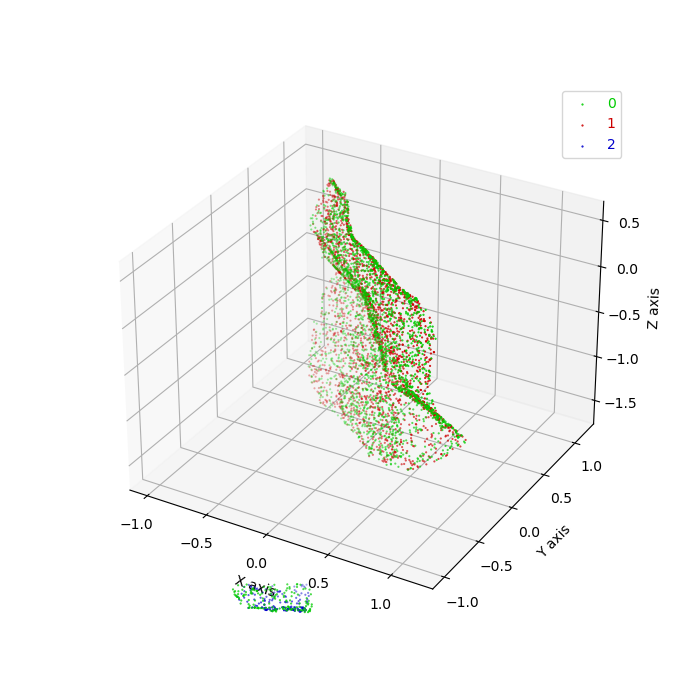

1111  "artifact/94078_sf/fractured_57"
2222  "[tensor[21874, 3] n=65622 (0.3Mb) x∈[-0.826, 3.423] μ=0.942 σ=1.482, tensor[10065, 3] n=30195 (0.1Mb) x∈[-0.825, 3.423] μ=0.865 σ=1.586, tensor[14290, 3] n=42870 (0.2Mb) x∈[-0.770, 3.423] μ=1.050 σ=1.461, tensor[3769, 3] n=11307 (44Kb) x∈[-0.674, 1.996] μ=0.738 σ=0.986]"
3333  "tensor[21874, 3] n=65622 (0.3Mb) x∈[-0.826, 3.423] μ=0.942 σ=1.482"
4444  "tensor[3] x∈[-0.234, 1.555] μ=0.942 σ=1.019 [1.555, 1.505, -0.234]"
5555  "array[4] x∈[-0.140, 0.990] μ=0.219 σ=0.450 [-0.140, 0.019, 0.006, 0.990]"
3333  "tensor[10065, 3] n=30195 (0.1Mb) x∈[-0.825, 3.423] μ=0.865 σ=1.586"
4444  "tensor[3] x∈[-0.621, 3.053] μ=0.865 σ=1.935 [-0.621, 3.053, 0.164]"
5555  "array[4] x∈[-0.282, 0.941] μ=0.215 σ=0.452 [0.941, -0.282, 0.186, 0.014]"
3333  "tensor[14290, 3] n=42870 (0.2Mb) x∈[-0.770, 3.423] μ=1.050 σ=1.461"
4444  "tensor[3] x∈[-0.432, 3.019] μ=1.050 σ=1.776 [3.019, 0.563, -0.432]"
5555  "array[4] x∈[-0.168, 0.859] μ=0.297 σ=0.402 [-0.168, 0.484, 0.01

In [9]:
for i, data in enumerate(train_data):
    # if i == 0:
    #     continue
    if i == 2:
        break
    broken_pcs = data['broken_pcs']
    quat = data['quat']
    trans = data['trans']

    broken_pcs_registered = []
    import jhutil; jhutil.jhprint(1111, len(broken_pcs), len(quat), len(trans))

    for bp, q, t in zip(broken_pcs, quat, trans):
        q = torch.Tensor(q)
        t = torch.Tensor(t)
        
        import jhutil; jhutil.jhprint(0000, bp)
        import jhutil; jhutil.jhprint(1111, q)
        import jhutil; jhutil.jhprint(2222, t)
        bp_registed = quat_trans_transform(q, t, bp)
        broken_pcs_registered.append(bp_registed)
        # show_point_clouds([broken_pcs_registered[0], broken_pcs_registered[4]])
    show_point_clouds(broken_pcs_registered, subsample_ratio=0.1)
    # show_meshes(data['dir_name'])

1111  "artifact/101902_sf/mode_4"
2222  "[tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.779, 1.053] μ=-0.065 σ=0.579, tensor[24952, 3] n=74856 (0.3Mb) x∈[-2.420, 2.178] μ=-0.036 σ=0.777, tensor[2269, 3] n=6807 (27Kb) x∈[-2.417, 2.174] μ=0.231 σ=1.788]"
3333  "tensor[22778, 3] n=68334 (0.3Mb) x∈[-1.779, 1.053] μ=-0.065 σ=0.579"
4444  "tensor[3] x∈[-0.442, 0.163] μ=-0.065 σ=0.328 [0.083, 0.163, -0.442]"
5555  "array[4] x∈[-0.656, 0.674] μ=-0.080 σ=0.494 [-0.340, 0.001, 0.674, -0.656]"
3333  "tensor[24952, 3] n=74856 (0.3Mb) x∈[-2.420, 2.178] μ=-0.036 σ=0.777"
4444  "tensor[3] x∈[-0.606, 0.258] μ=-0.036 σ=0.494 [0.240, 0.258, -0.606]"
5555  "array[4] x∈[-0.301, 0.949] μ=0.174 σ=0.469 [0.083, -0.301, 0.949, -0.036]"
3333  "tensor[2269, 3] n=6807 (27Kb) x∈[-2.417, 2.174] μ=0.231 σ=1.788"
4444  "tensor[3] x∈[-2.265, 1.782] μ=0.231 σ=2.183 [1.782, 1.176, -2.265]"
5555  "array[4] x∈[-0.180, 0.888] μ=0.290 σ=0.407 [0.030, 0.888, 0.421, -0.180]"


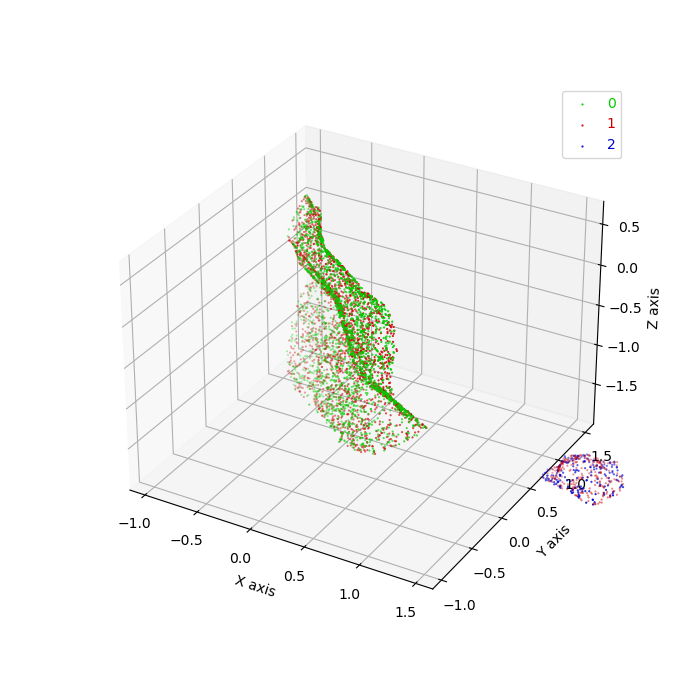

1111  "artifact/101902_sf/mode_2"
2222  "[tensor[25036, 3] n=75108 (0.3Mb) x∈[-2.340, 1.056] μ=-0.125 σ=0.659, tensor[23555, 3] n=70665 (0.3Mb) x∈[-1.771, 1.059] μ=-0.065 σ=0.578, tensor[1407, 3] n=4221 (16Kb) x∈[-2.370, 0.513] μ=-1.126 σ=1.026]"
3333  "tensor[25036, 3] n=75108 (0.3Mb) x∈[-2.340, 1.056] μ=-0.125 σ=0.659"
4444  "tensor[3] x∈[-0.543, 0.092] μ=-0.125 σ=0.363 [0.092, 0.078, -0.543]"
5555  "array[4] x∈[-0.470, 0.818] μ=0.113 σ=0.487 [0.818, -0.470, -0.176, 0.281]"
3333  "tensor[23555, 3] n=70665 (0.3Mb) x∈[-1.771, 1.059] μ=-0.065 σ=0.578"
4444  "tensor[3] x∈[-0.445, 0.164] μ=-0.065 σ=0.331 [0.084, 0.164, -0.445]"
5555  "array[4] x∈[0.070, 0.768] μ=0.434 σ=0.247 [0.443, 0.456, 0.768, 0.070]"
3333  "tensor[1407, 3] n=4221 (16Kb) x∈[-2.370, 0.513] μ=-1.126 σ=1.026"
4444  "tensor[3] x∈[-2.214, 0.234] μ=-1.126 σ=1.247 [0.234, -1.397, -2.214]"
5555  "array[4] x∈[-0.645, 0.707] μ=-0.000 σ=0.500 [0.171, 0.707, -0.235, -0.645]"


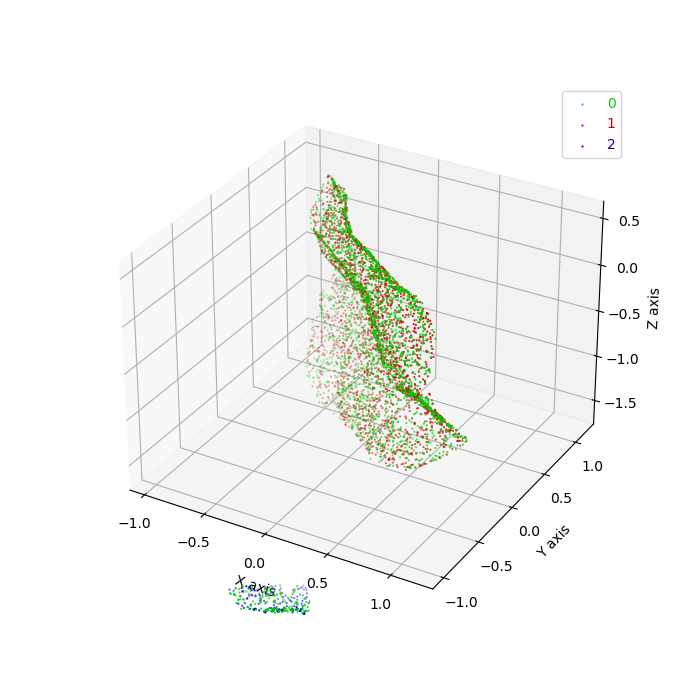

1111  "artifact/94078_sf/fractured_57"
2222  "[tensor[21874, 3] n=65622 (0.3Mb) x∈[-0.826, 3.423] μ=0.942 σ=1.482, tensor[10065, 3] n=30195 (0.1Mb) x∈[-0.825, 3.423] μ=0.865 σ=1.586, tensor[14290, 3] n=42870 (0.2Mb) x∈[-0.770, 3.423] μ=1.050 σ=1.461, tensor[3769, 3] n=11307 (44Kb) x∈[-0.674, 1.996] μ=0.738 σ=0.986]"
3333  "tensor[21874, 3] n=65622 (0.3Mb) x∈[-0.826, 3.423] μ=0.942 σ=1.482"
4444  "tensor[3] x∈[-0.234, 1.555] μ=0.942 σ=1.019 [1.555, 1.505, -0.234]"
5555  "array[4] x∈[-0.140, 0.990] μ=0.219 σ=0.450 [-0.140, 0.019, 0.006, 0.990]"
3333  "tensor[10065, 3] n=30195 (0.1Mb) x∈[-0.825, 3.423] μ=0.865 σ=1.586"
4444  "tensor[3] x∈[-0.621, 3.053] μ=0.865 σ=1.935 [-0.621, 3.053, 0.164]"
5555  "array[4] x∈[-0.282, 0.941] μ=0.215 σ=0.452 [0.941, -0.282, 0.186, 0.014]"
3333  "tensor[14290, 3] n=42870 (0.2Mb) x∈[-0.770, 3.423] μ=1.050 σ=1.461"
4444  "tensor[3] x∈[-0.432, 3.019] μ=1.050 σ=1.776 [3.019, 0.563, -0.432]"
5555  "array[4] x∈[-0.168, 0.859] μ=0.297 σ=0.402 [-0.168, 0.484, 0.01

In [10]:
for i, data in enumerate(train_data):
    # if i == 0:
    #     continue
    if i == 2:
        break
    broken_pcs = data['broken_pcs']
    quat = data['quat']
    trans = data['trans']

    broken_pcs_registered = []

    for bp, q, t in zip(broken_pcs, quat, trans):
        q = torch.Tensor(q)
        t = torch.Tensor(t)
        
        # import jhutil; jhutil.jhprint(0000, bp)
        # import jhutil; jhutil.jhprint(1111, q)
        # import jhutil; jhutil.jhprint(2222, t)
        bp_registed = quat_trans_transform(q, t, bp)
        broken_pcs_registered.append(bp_registed)
        # show_point_clouds([broken_pcs_registered[0], broken_pcs_registered[4]])
    show_point_clouds(broken_pcs_registered, subsample_ratio=0.1)
    # show_meshes(data['dir_name'])